# IRIS Data Set Implement Linear Discrimminant Analaysis

# Data Ingestion:

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)

In [34]:
df = pd.read_csv("iris.csv", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Checking null values

In [35]:
df[df.isnull().any(axis=1)].count()

0    0
1    0
2    0
3    0
4    0
dtype: int64

E:\anacondaaaaaaaaaaaaaa\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


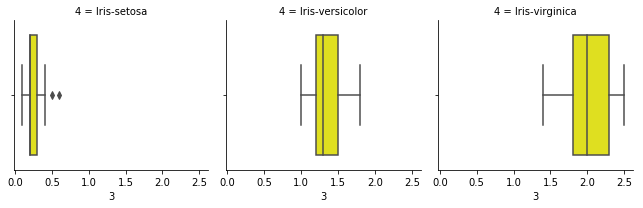

In [36]:
a = sns.FacetGrid(df, col=4)
a.map(sns.boxplot, 3, color='yellow')

# Encode categorical 

In [37]:
#Encode categorical class labels
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Standardize features

In [38]:
#Standardize features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values)
X_train_std

array([[-9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00],
       [-1.1430e+00, -1.2496e-01, -1.3413e+00, -1.3130e+00],
       [-1.3854e+00,  3.3785e-01, -1.3981e+00, -1.3130e+00],
       [-1.5065e+00,  1.0645e-01, -1.2844e+00, -1.3130e+00],
       [-1.0218e+00,  1.2635e+00, -1.3413e+00, -1.3130e+00],
       [-5.3718e-01,  1.9577e+00, -1.1707e+00, -1.0500e+00],
       [-1.5065e+00,  8.0065e-01, -1.3413e+00, -1.1815e+00],
       [-1.0218e+00,  8.0065e-01, -1.2844e+00, -1.3130e+00],
       [-1.7489e+00, -3.5636e-01, -1.3413e+00, -1.3130e+00],
       [-1.1430e+00,  1.0645e-01, -1.2844e+00, -1.4444e+00],
       [-5.3718e-01,  1.4949e+00, -1.2844e+00, -1.3130e+00],
       [-1.2642e+00,  8.0065e-01, -1.2275e+00, -1.3130e+00],
       [-1.2642e+00, -1.2496e-01, -1.3413e+00, -1.4444e+00],
       [-1.8700e+00, -1.2496e-01, -1.5119e+00, -1.4444e+00],
       [-5.2506e-02,  2.1891e+00, -1.4550e+00, -1.3130e+00],
       [-1.7367e-01,  3.1147e+00, -1.2844e+00, -1.0500e+00],
       [-5.3718e-01,  1.

In [39]:
# Construct within-class covariant scatter matrix S_W
S_W = np.zeros((4,4))
for i in range(3):
    S_W += np.cov(X_train_std[y==i].T)

In [40]:
#Construct between-class scatter matrix S_B
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(3)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean
S_B=np.zeros((4,4))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))
    

# eigenvalues and eigenvectors

In [41]:
#Calculate sorted eigenvalues and eigenvectors of inverse(S_W)dot(S_B)
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

1581.325932186763
13.600776328162324
2.233044981586705e-13
3.7422465181580165e-14


# LDA components

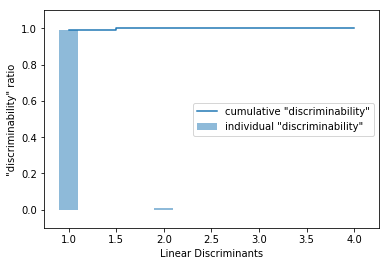

In [42]:
#Plot main LDA components
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 5), discr, width=0.2,alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 5), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [43]:
#Project original features onto the new feature space
W=np.hstack((eigen_pairs[0][1][:, ].reshape(4,1),eigen_pairs[1][1][:, ].reshape(4,1))).real
X_train_lda = X_train_std.dot(W)

# transformed features in LDA

In [44]:
#Plot transformed features in LDA subspace
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-1.790936,0.115414,0
1,-1.583202,-0.265463,0
2,-1.663881,-0.083657,0
3,-1.514646,-0.225901,0
4,-1.807076,0.189973,0


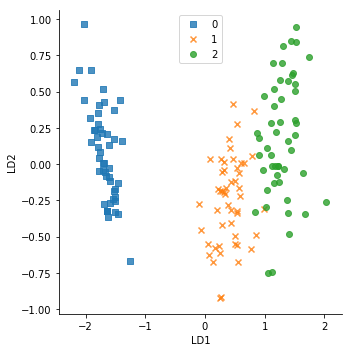

In [45]:
markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()

# LDA implementation using scikit-learn

In [46]:
#LDA implementation using scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y)
X_train_lda

array([[-8.085 ,  0.3285],
       [-7.1472, -0.7555],
       [-7.5114, -0.2381],
       [-6.8377, -0.6429],
       [-8.1578,  0.5406],
       [-7.7236,  1.4823],
       [-7.2351,  0.3772],
       [-7.6297,  0.0167],
       [-6.5827, -0.9874],
       [-7.3688, -0.9136],
       [-8.4218,  0.6762],
       [-7.2474, -0.0829],
       [-7.3506, -1.0394],
       [-7.5965, -0.7767],
       [-9.8694,  1.6149],
       [-9.1803,  2.7556],
       [-8.5976,  1.8544],
       [-7.7996,  0.6091],
       [-8.1   ,  0.9961],
       [-8.0454,  1.1624],
       [-7.5205, -0.1562],
       [-7.6053,  1.2276],
       [-8.7041,  0.8996],
       [-6.2637,  0.4602],
       [-6.5919, -0.362 ],
       [-6.7921, -0.9382],
       [-6.8405,  0.4848],
       [-7.9484,  0.2387],
       [-8.0121,  0.1163],
       [-6.8559, -0.5172],
       [-6.783 , -0.7293],
       [-7.3867,  0.591 ],
       [-9.1625,  1.2509],
       [-9.4962,  1.8499],
       [-7.3688, -0.9136],
       [-7.9757, -0.1352],
       [-8.6312,  0.4346],
 

In [47]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-8.084953,0.328454,0
1,-7.147163,-0.755473,0
2,-7.511378,-0.238078,0
3,-6.837676,-0.642885,0
4,-8.157814,0.540639,0


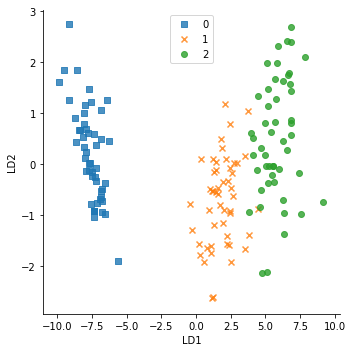

In [48]:
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()